## selectionSort() Experiment

In [2]:
# import modules for use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer
import math
import random
import array as arr

The following two cells comprise of two functions. The first function finds the smallest element in a list. The second function sorts the list. The second function's performance will be tested against two built-in Python sorting functions. 

In [20]:
# find smallest of a list 
def findSmallest(arr):
    smallest = arr[0]
    smallest_index = 0
    for i in range(1, len(arr)):
        if arr[i] < smallest:
            smallest = arr[i]
            smallest_index = i
    return smallest_index

In [21]:
# selection sort algorithm
def selectionSort(arr):
    newArr = []
    for i in range(len(arr)):
        smallest = findSmallest(arr)
        newArr.append(arr.pop(smallest))
    return newArr

The following cells create five random lists of various lengths. Following the random lists is a list of the lists and lists for tracking performance and the length of each random list. The list of lists will be used in a loop to measure the selectionSort() algorithm performance against the built-in Python functions. 

In [34]:
# create 5 lists, seed set at 32 for all
random.seed(32)
a = [random.uniform(1, 5000) for i in range(5000)]

In [35]:
random.seed(32)
b = [random.uniform(1, 10000) for i in range(10000)]

In [36]:
random.seed(32)
c = [random.uniform(1, 15000) for i in range(15000)]

In [37]:
random.seed(32)
d = [random.uniform(1, 20000) for i in range(20000)]

In [38]:
random.seed(32)
e = [random.uniform(1, 25000) for i in range(25000)]

In [39]:
# create list of the lists for a loop
arrays = [a,b,c,d,e]

In [40]:
# lists for tracking data
lengths = []
sel_sort_times = []
py_sort_times = []
py_sorted_times = []

The following cell loops through each list from the list of lists. The list's length is captured, and the performance of the different functions are measured. The performance data and list's length is appended to the data tracking lists in the above cell. 

In [41]:
# loop through each list, perform algorithms, and gather performance data
for item in arrays:
    arr1 = item
    arr2 = item
    length = len(item)
    lengths.append(length)
    start1 = timer()
    selectionSort(item)
    end1 = timer()
    sel_sort_speed = (end1 - start1) * 1000
    sel_sort_times.append(sel_sort_speed)
    start2 = timer()
    arr1.sort()
    end2 = timer()
    py_sort_speed = (end2 - start2) * 1000
    py_sort_times.append(py_sort_speed)
    start3 = timer()
    sorted(arr2)
    end3 = timer()
    py_sorted_speed = (end3 - start3) * 1000
    py_sorted_times.append(py_sorted_speed)

In [42]:
# create a df for analysis of results
data = list(zip(lengths, sel_sort_times, py_sort_times, py_sorted_times))
df = pd.DataFrame(data, columns=['List_Length','Selection_Sort_Time','Py_Sort_Time','Py_Sorted_Time'])
df

,List_Length,Selection_Sort_Time,Py_Sort_Time,Py_Sorted_Time
0,5000,2403.4073,0.0045,0.0072
1,10000,8675.7183,0.0051,0.0071
2,15000,19450.8598,0.0048,0.0078
3,20000,35015.3493,0.0066,0.0096
4,25000,55073.9713,0.0066,0.0099


The above cell is a dataframe with all the list lengths and performance times for each function on each list. Below are scatterplot visualizations which capture performance based on the list size. 

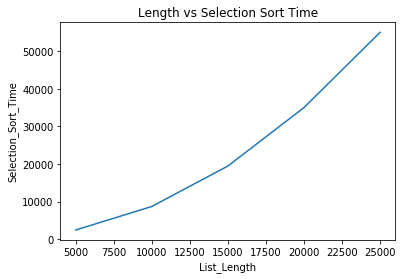

In [43]:
# scatterplots to visualize results
sns.lineplot(x = df['List_Length'], y = df['Selection_Sort_Time']).set_title('Length vs Selection Sort Time')
plt.show()

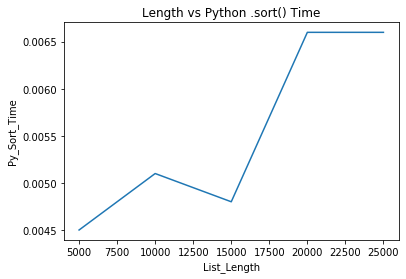

In [44]:
sns.lineplot(df['List_Length'], df['Py_Sort_Time']).set_title('Length vs Python .sort() Time')
plt.show()

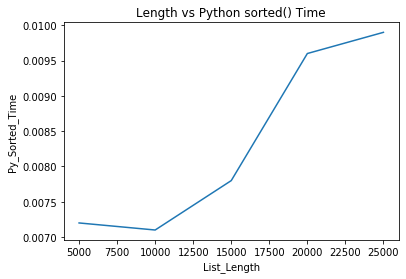

In [45]:
sns.lineplot(df['List_Length'], df['Py_Sorted_Time']).set_title('Length vs Python sorted() Time')
plt.show()

## Executive Summary

In this experiment we tested the built-in sort() function and sorted() function, and the user-defined selectionSort() function. I have provided a data table (dataframe) that provides the processing speed results of each operation in milliseconds. The scatterplots below the data table also visualize the results of the experiment.

The table and visualizations demonstrate the differences in processing times of each sorting algorithm. For the selectionSort() algorithm, the time increases as the list size increases. The differences in processing times for the selectionSort() algorithm and the built-in functions are significant. 

The selectionSort() algorithm searches through a list to find the smallest value index, and creates a new list beginning with the smallest value of the list that is being sorted. The selectionSort() algorithm has a BigO notation of O(n^2). 

The BigO notation for the sorted() function and sort() function is O(n log n). These functions are significantly less complex than the selectionSort() algorithm. In BigO notation, (n log n) is more efficient than (n^2). This is well represented in the visualizations shared above. 

The selectionSort() algorithm is useful to data engineers as they can arrange lists. However, the sorted() and sort() functions are much more efficient and achieve the same results. The processing time for large lists using the selectionSort() algorithm may pose a challenge. On the other hand, we could utilize sorted() or sort() with much more efficiency. 